In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [13]:
pd.read_csv('../../dir/t.csv', header=None)

,0,1,2,3
0,1,2,3,4
1,NaN,d,f,NaN
2,j,jf,f,dfk
3,NaN,NaN,df,NaN
4,df,NaN,NaN,dfs
5,sd,sdf,df,NaN
6,ldf,lf,o,w


In [14]:
from sklearn import datasets

In [17]:
iris = datasets.load_iris()

In [21]:
data = iris['data']

In [24]:
pd.DataFrame(data).corr()

,0,1,2,3
0,1.000000,-0.117570,0.871754,0.817941
1,-0.117570,1.000000,-0.428440,-0.366126
2,0.871754,-0.428440,1.000000,0.962865
3,0.817941,-0.366126,0.962865,1.000000


In [48]:
pd.DataFrame(data).cov()

,0,1,2,3
0,0.685694,-0.042434,1.274315,0.516271
1,-0.042434,0.189979,-0.329656,-0.121639
2,1.274315,-0.329656,3.116278,1.295609
3,0.516271,-0.121639,1.295609,0.581006


In [59]:
std = pd.DataFrame(data).std()
std

0    0.828066
1    0.435866
2    1.765298
3    0.762238
dtype: float64

In [57]:
np.diag(1 / std).dot(pd.DataFrame(data).cov()).dot(np.diag(1 / std))

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [69]:
pd.DataFrame(data).cov() / np.array(std).reshape(4,1) / np.array(std).reshape(1,4)

,0,1,2,3
0,1.000000,-0.117570,0.871754,0.817941
1,-0.117570,1.000000,-0.428440,-0.366126
2,0.871754,-0.428440,1.000000,0.962865
3,0.817941,-0.366126,0.962865,1.000000


In [28]:
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [36]:
data.mean(axis=0).round(2)

array([5.84, 3.06, 3.76, 1.2 ])

In [50]:
data_centered = data - data.mean(axis=0)

In [70]:
cov = data_centered.T.dot(data_centered) / (data.shape[0] - 1)
cov

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [84]:
np.diag(1 / np.diag(cov) ** 0.5).dot(cov).dot(np.diag(1 / np.diag(cov) ** 0.5))

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [86]:
covn = data_centered.T.dot(data_centered)
covn

array([[102.16833333,  -6.32266667, 189.873     ,  76.92433333],
       [ -6.32266667,  28.30693333, -49.1188    , -18.12426667],
       [189.873     , -49.1188    , 464.3254    , 193.0458    ],
       [ 76.92433333, -18.12426667, 193.0458    ,  86.56993333]])

In [87]:
np.diag(1 / np.diag(covn) ** 0.5).dot(covn).dot(np.diag(1 / np.diag(covn) ** 0.5))

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

<AxesSubplot:>

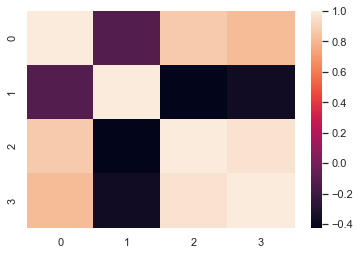

In [88]:
sns.heatmap(np.diag(1 / np.diag(covn) ** 0.5).dot(covn).dot(np.diag(1 / np.diag(covn) ** 0.5)))